In [6]:
import numpy as np
import pandas as pd
import mnist
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
#from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
from scikeras.wrappers import KerasClassifier

In [8]:
import matplotlib.pyplot as plt

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
type(x_train)

numpy.ndarray

In [37]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

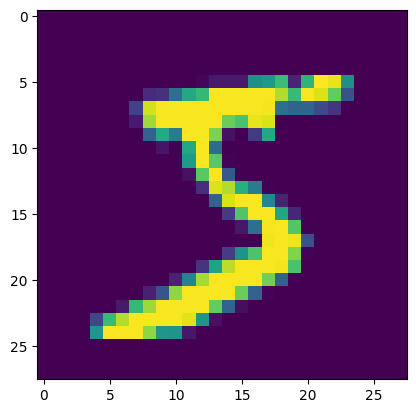

In [38]:
plt.imshow(x_train[0])

In [39]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

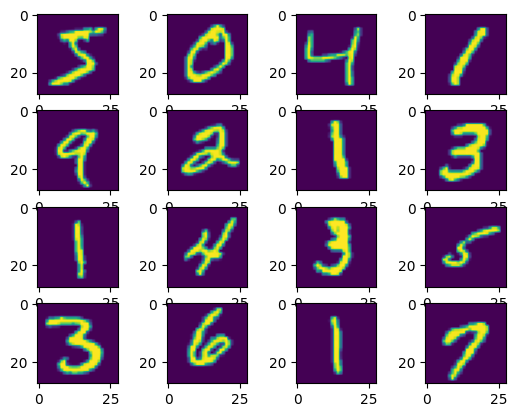

In [40]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [41]:
input_shape = (28, 28, 1)

In [42]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [43]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


c:\Users\Сергей\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 14s 6ms/step - loss: 5.3095e-07 - accuracy: 0.0756
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 5.3095e-07 - accuracy: 0.0756
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3095e-07 - accuracy: 0.0756
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 5.3095e-07 - accuracy: 0.0756
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 5.3095e-07 - accuracy: 0.0756
CPU times: total: 59.6 s
Wall time: 48.6 s


In [45]:
x_train = x_train / 255
x_test = x_test / 255

In [46]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [47]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [48]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [49]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 4ms/step - loss: 0.3223 - accuracy: 0.9084
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1630 - accuracy: 0.9528
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1200 - accuracy: 0.9649
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0952 - accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0803 - accuracy: 0.9758
CPU times: total: 1min 3s
Wall time: 56.3 s


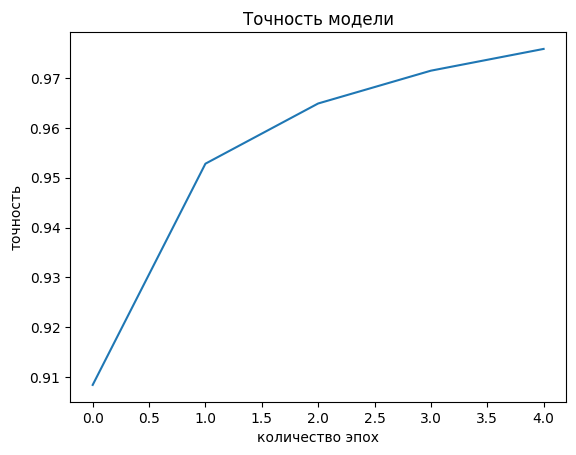

In [50]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

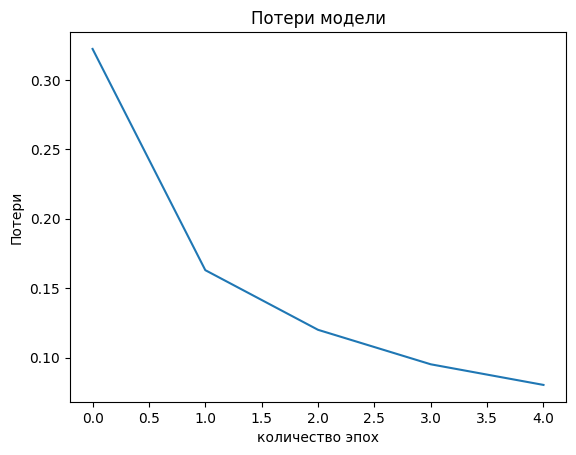

In [51]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [56]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.0950 - accuracy: 0.9728


[0.09495433419942856, 0.9728000164031982]

In [57]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0363 - accuracy: 0.9887 - val_loss: 0.0947 - val_accuracy: 0.9737
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0999 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0983 - val_accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0265 - accuracy: 0.9921 - val_loss: 0.1102 - val_accuracy: 0.9715
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.1065 - val_accuracy: 0.9719
CPU times: total: 1min 11s
Wall time: 48.9 s


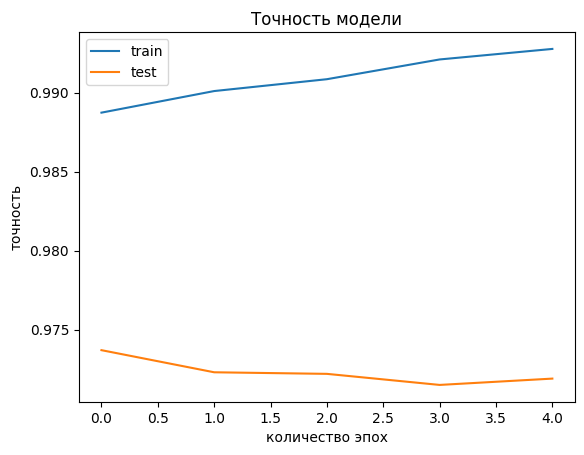

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


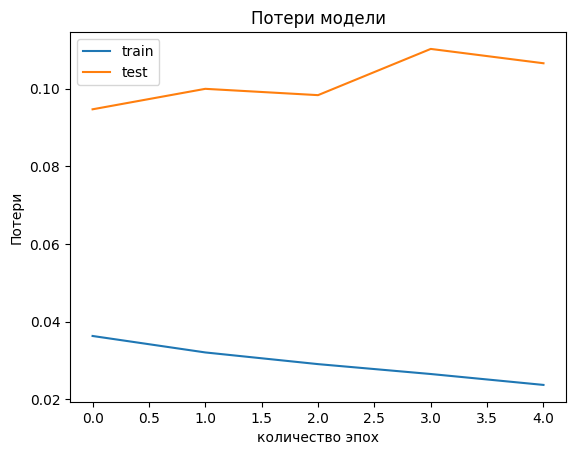

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

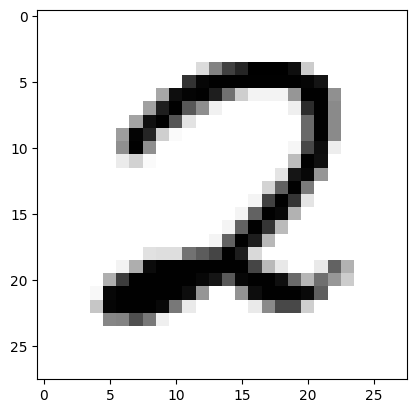

1/1 [==============================] - 36s 36s/step
1: 2


In [60]:
n_rec=35
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

prediction = model_2.predict(x)
prediction = np.argmax(prediction[0])
print("1:", prediction)

In [61]:
# Build the model.
def create_model(optimizer='adam'):
    model = Sequential([
      Dense(64, input_shape=(784,), activation='relu'),
      Dense(32, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [63]:
#import images
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

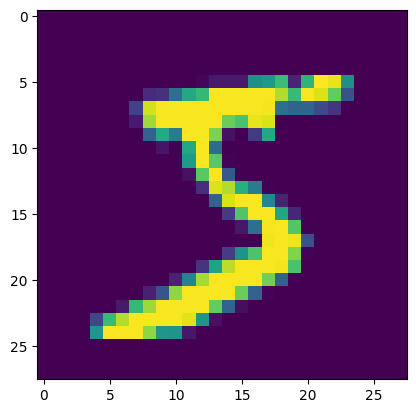

In [64]:
import matplotlib.pyplot as plt
plt.imshow(mnist.train_images()[0]/255)
mnist.train_images()[1]/255
to_categorical(train_labels)
#train_labels

In [65]:
model = create_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1875/1875 [==============================] - 25s 4ms/step - loss: 0.2928 - accuracy: 0.9136
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1310 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0975 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0770 - accuracy: 0.9761
Epoch 5/5
313/313 [==============================] - 3s 4ms/step - loss: 0.0960 - accuracy: 0.9718
**************
Loss - 0.1, Metrics - 0.972


In [66]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:10]}')

1/1 [==============================] - 0s 139ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


Picking params via GridSearchCV

In [67]:
batch_size = [ 500, 1000]
epochs = [5, 10]
optimizer = ['SGD', 'RMSprop', 'Adam']

In [68]:
model = KerasClassifier(create_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/5
80/80 [==============================] - 9s 21ms/step - loss: 1.0242 - accuracy: 0.6999
Epoch 2/5
80/80 [==============================] - 1s 14ms/step - loss: 0.3228 - accuracy: 0.9089
Epoch 3/5
80/80 [==============================] - 1s 14ms/step - loss: 0.2507 - accuracy: 0.9293
Epoch 4/5
80/80 [==============================] - 1s 14ms/step - loss: 0.2117 - accuracy: 0.9397
Epoch 5/5
40/40 [==============================] - 1s 6ms/step
Epoch 1/5
80/80 [==============================] - 4s 16ms/step - loss: 0.8949 - accuracy: 0.7695
Epoch 2/5
80/80 [==============================] - 1s 18ms/step - loss: 0.3020 - accuracy: 0.9141
Epoch 3/5
80/80 [==============================] - 1s 18ms/step - loss: 0.2316 - accuracy: 0.9346
Epoch 4/5
80/80 [==============================] - 1s 13ms/step - loss: 0.1922 - accuracy: 0.9459
Epoch 5/5
40/40 [==============================] - 0s 6ms/step
Epoch 1/5
80/80 [==============================] - 4s 15ms/step - loss: 0.9338 - accuracy:

In [69]:
df = pd.DataFrame(grid_result.cv_results_)

In [70]:
df.sort_values(['mean_test_score'],ascending=False)[['param_batch_size','param_epochs','param_optimizer','mean_test_score']].head(10)

,param_batch_size,param_epochs,param_optimizer,mean_test_score
4,500,10,RMSprop,0.957600
5,500,10,Adam,0.956967
3,500,10,SGD,0.955233
9,1000,10,SGD,0.951233
11,1000,10,Adam,0.948950
10,1000,10,RMSprop,0.948217
2,500,5,Adam,0.945650
0,500,5,SGD,0.945550
1,500,5,RMSprop,0.943633
7,1000,5,RMSprop,0.933733


ДОМАШНЕЕ ЗАДАНИЕ

In [12]:
# меняю оптимизатор, добавляю слой с увеличенным числом нейронов
def my_model(optimizer='RMSprop'):
    model = Sequential([
      Dense(128, input_shape=(784,), activation='relu'),
      Dense(64, activation='relu'),
      Dense(10, activation='softmax')
    ])

    # Compile the model.
    model.compile(
      optimizer=optimizer,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )
    return model

In [78]:
to_categorical(test_labels)

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
model = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=5, batch_size=32)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2371 - accuracy: 0.9309
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1052 - accuracy: 0.9689
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0778 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0625 - accuracy: 0.9815
Epoch 5/5
313/313 [==============================] - 2s 4ms/step - loss: 0.0891 - accuracy: 0.9797
**************
Loss - 0.09, Metrics - 0.98


добавляю валидационную выборку, меняю параметры

In [80]:
model_2 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=3, batch_size=64, validation_split=0.3)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/3
657/657 [==============================] - 6s 8ms/step - loss: 0.0347 - accuracy: 0.9897 - val_loss: 0.0403 - val_accuracy: 0.9884
Epoch 2/3
657/657 [==============================] - 6s 9ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0476 - val_accuracy: 0.9872
Epoch 3/3
313/313 [==============================] - 1s 5ms/step - loss: 0.0972 - accuracy: 0.9764
**************
Loss - 0.1, Metrics - 0.976


In [81]:
model_3 = my_model()

# Train the model.
model.fit(train_images, to_categorical(train_labels), epochs=7, batch_size=128, validation_split=0.2)

# Evaluate the model.
loss,metrics = model.evaluate(test_images, to_categorical(test_labels))
print('**************')
print(f'Loss - {np.round(loss,2)}, Metrics - {np.round(metrics,3)}')

Epoch 1/7
375/375 [==============================] - 6s 13ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0424 - val_accuracy: 0.9885
Epoch 2/7
375/375 [==============================] - 4s 11ms/step - loss: 0.0129 - accuracy: 0.9962 - val_loss: 0.0466 - val_accuracy: 0.9878
Epoch 3/7
375/375 [==============================] - 6s 15ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 4/7
375/375 [==============================] - 6s 17ms/step - loss: 0.0076 - accuracy: 0.9978 - val_loss: 0.0481 - val_accuracy: 0.9872
Epoch 5/7
375/375 [==============================] - 5s 13ms/step - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0594 - val_accuracy: 0.9850
Epoch 6/7
375/375 [==============================] - 5s 12ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.0517 - val_accuracy: 0.9877
Epoch 7/7
313/313 [==============================] - 1s 4ms/step - loss: 0.0997 - accuracy: 0.9793
**************
Loss - 0.1, Metrics - 0.979


In [82]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[:20]}')

1/1 [==============================] - 0s 310ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
True labels: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [83]:
batch_size = [70, 80, 90]
epochs = [18, 25]
optimizer = ['RMSprop', 'Adam']

In [84]:
model = KerasClassifier(my_model)
params= dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(model, params, refit=False, cv=3, scoring='accuracy')

grid_result = grid.fit(train_images, to_categorical(train_labels))
print(grid_result.best_score_, grid_result.best_params_)

Epoch 1/18
572/572 [==============================] - 10s 7ms/step - loss: 0.3338 - accuracy: 0.9037
Epoch 2/18
572/572 [==============================] - 4s 7ms/step - loss: 0.1458 - accuracy: 0.9573
Epoch 3/18
572/572 [==============================] - 4s 7ms/step - loss: 0.0996 - accuracy: 0.9697
Epoch 4/18
572/572 [==============================] - 4s 8ms/step - loss: 0.0758 - accuracy: 0.9764
Epoch 5/18
572/572 [==============================] - 4s 8ms/step - loss: 0.0594 - accuracy: 0.9819
Epoch 6/18
572/572 [==============================] - 5s 8ms/step - loss: 0.0467 - accuracy: 0.9855
Epoch 7/18
572/572 [==============================] - 5s 8ms/step - loss: 0.0377 - accuracy: 0.9887
Epoch 8/18
572/572 [==============================] - 5s 8ms/step - loss: 0.0308 - accuracy: 0.9902
Epoch 9/18
572/572 [==============================] - 5s 9ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 10/18
572/572 [==============================] - 5s 9ms/step - loss: 0.0214 - accuracy: 0.993

Вывод:</br> 
1 Введение дополнительного скрытого слоя улучшает показатель метрики. </br> 
2 Умеренное увеличение количества эпох улучшает показатель метрики. </br> 
3 Умеренное увеличение batch_size ускоряет обучение. </br> 
4 Наличие валидационной выборки препятствует переобучению.

### (по желанию ) Нарисуйте цифру от руки, преобразуйте как надо и подайте на вход вашей обученной нейронности, оцените точность предсказания.

In [47]:
import cv2

In [48]:
# Определение архитектуры модели
model_4 = Sequential([
    Flatten(input_shape=(28, 28)),  # Преобразование двумерного массива 28x28 в одномерный массив размером 784
    Dense(128, activation='relu'),  # Полносвязный слой с 128 нейронами и функцией активации ReLU
    Dense(10, activation='softmax')  # Выходной слой с 10 нейронами (по одному на каждую цифру) и функцией активации softmax
])

In [49]:
# Компиляция модели
model_4.compile(optimizer='adam',  # Оптимизатор Adam
              loss='sparse_categorical_crossentropy',  # Функция потерь для многоклассовой классификации
              metrics=['accuracy'])  # Метрика точности для оценки производительности модели


In [50]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Загрузка изображения с цифрой
image_path = '123.png'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

1/1 [==============================] - 0s 227ms/step


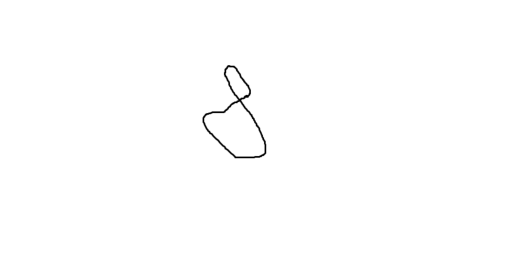

Предсказанная цифра: 8


In [55]:
# Проверка на успешную загрузку изображения
if image is None:
    print("Не удалось загрузить изображение. Проверьте путь к файлу.")
else:
    # Предобработка изображения
    resized_image = cv2.resize(image, (28, 28))  # Изменение размера до 28x28 пикселей
    normalized_image = resized_image.astype(np.float32) / 255.0  # Нормализация значений пикселей
    processed_image = normalized_image.reshape(1, 28, 28)  # Преобразование в формат, подходящий для подачи в модель
    
    # Подача изображения на вход модели для предсказания
    prediction = model_4.predict(processed_image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Убираем оси координат
    plt.show()
    
    predicted_label = np.argmax(prediction)
    print("Предсказанная цифра:", predicted_label)